In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("multiple_linear_regression.csv")

In [3]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

## Splitting data

In [5]:
x=df.iloc[:, df.columns != "Target"]

In [6]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [7]:
y=df["Target"]

In [8]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

## Train,Test,Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
np.random.seed(30)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

## <font color='green'> Multiple Linear Regression </font>

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [13]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [14]:
lr.coef_

array([0.0457314 , 0.18162094, 0.0023763 ])

#### 3 different parameters so 3 different coefficient (3 omega values)

In [15]:
lr.intercept_

3.0526928805671822

#### This is the c value

## Prediction

In [16]:
pred=lr.predict(xtest)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
cost=mean_squared_error(ytest,pred)

In [19]:
cost

2.5659058796031653

In [20]:
print(f"Accuracy is {100-cost}%")

Accuracy is 97.43409412039684%


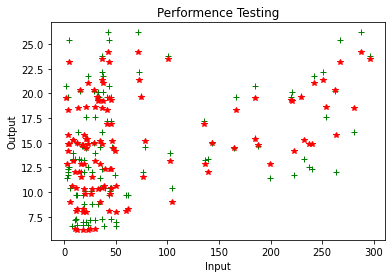

In [21]:
plt.plot(xtest,ytest,"+",color='green')
plt.plot(xtest,pred,"*",color='red')
plt.title("Performence Testing")
plt.xlabel("Input")
plt.ylabel("Output");

## <font color='green'> Ordinary Least Squared Method </font>

In [22]:
import statsmodels.api as sm

In [23]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We normally have m1x1 + m2x2 + m3x3 + c...... So we need to prepare that extra c

In [24]:
xtrain_constant=sm.add_constant(xtrain)
xtrain_constant

,const,Feature 1,Feature 2,Feature 3
125,1.0,87.2,11.8,25.9
60,1.0,53.5,2.0,21.4
90,1.0,134.3,4.9,9.3
152,1.0,197.6,23.3,14.2
40,1.0,202.5,22.3,31.6
...,...,...,...,...
140,1.0,73.4,17.0,12.9
45,1.0,175.1,22.5,31.5
173,1.0,168.4,7.1,12.8
165,1.0,234.5,3.4,84.8


**It would not make any difference to the model but it would just to keep the `c` value**

In [25]:
 model=sm.OLS(ytrain,xtrain_constant)

In [26]:
result=model.fit()

In [27]:
result.params

const        3.052693
Feature 1    0.045731
Feature 2    0.181621
Feature 3    0.002376
dtype: float64

In [28]:
lr.coef_

array([0.0457314 , 0.18162094, 0.0023763 ])

**Exactly same values**

In [29]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     435.6
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.42e-75
Time:                        01:36:25   Log-Likelihood:                -310.97
No. Observations:                 160   AIC:                             629.9
Df Residuals:                     156   BIC:                             642.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0527      0.348      8.760      0.0

In [30]:
xtest=sm.add_constant(xtest)
y_pred=result.predict(xtest)
y_pred

143     8.953182
81     14.851414
26     14.939145
150    18.501951
124    19.590727
24      8.233669
126    10.594693
142    19.256344
129     8.060154
171    14.484023
72     10.317648
97     15.374747
21     14.891437
67     12.080819
106     6.264384
184    18.599138
111    21.062699
63     13.145249
93     21.327672
183    24.185363
86     11.574596
158    10.396972
133    19.295928
50     12.835072
99     16.918244
199    15.249565
189     6.161089
101    23.440089
100    14.122666
103    14.812039
139    19.485628
57     12.807878
36     23.225283
114    15.210731
54     20.334798
25     15.757489
1      12.332614
149     9.831659
193    18.317325
121     7.973383
dtype: float64

In [31]:
cost=mean_squared_error(ytest,y_pred)

In [32]:
cost

2.5659058796031564

In [33]:
x=x.drop('Feature 3',axis=1)
np.random.seed(30)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
cost=mean_squared_error(ytest,pred)

In [34]:
cost

2.533440587564948

In [35]:
100-cost

97.46655941243505

In [36]:
x=df.iloc[:, df.columns != "Target"]
np.random.seed(30)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
cost=mean_squared_error(ytest,pred)
cost

2.5659058796031653

In [37]:
100-cost

97.43409412039684